In [ ]:
pip install tensorflow keras matplotlib numpy pandas scikit-learn opencv-python

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_dataset")

In [ ]:
import os

for root, dirs, files in os.walk("brain_tumor_dataset"):
    print(f"Folder: {root}")
    for f in files[:5]:
        print(f"  - {f}")


Folder: brain_tumor_dataset
Folder: brain_tumor_dataset/yes
  - Y24.jpg
  - Y165.JPG
  - Y36.JPG
  - Y47.JPG
  - Y252.jpg
Folder: brain_tumor_dataset/brain_tumor_dataset
Folder: brain_tumor_dataset/brain_tumor_dataset/yes
  - Y24.jpg
  - Y165.JPG
  - Y36.JPG
  - Y47.JPG
  - Y252.jpg
Folder: brain_tumor_dataset/brain_tumor_dataset/no
  - 39 no.jpg
  - 28 no.jpg
  - 43 no.jpg
  - No19.jpg
  - no 4.jpg
Folder: brain_tumor_dataset/no
  - 39 no.jpg
  - 28 no.jpg
  - 43 no.jpg
  - No19.jpg
  - no 4.jpg


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

DATA_DIR = "brain_tumor_dataset"
CATEGORIES = ['no', 'yes']

IMG_SIZE = 150
data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    label = CATEGORIES.index(category)

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized_img, label])
        except Exception as e:
            print(f"Error with image {img_path}:", e)

import random
random.shuffle(data)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = to_categorical(y, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Data loaded: {len(X)} images")
print(f"Training: {len(X_train)}, Testing: {len(X_test)}")


Data loaded: 253 images
Training: 202, Testing: 51


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,034 (40.57 MB)

 Trainable params: 10,636,034 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)) #hgjmhvt  jgvy


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5999 - loss: 348.4974 - val_accuracy: 0.4118 - val_loss: 30.6167
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 965ms/step - accuracy: 0.5477 - loss: 18.8615 - val_accuracy: 0.8235 - val_loss: 3.1055
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 907ms/step - accuracy: 0.7347 - loss: 2.6445 - val_accuracy: 0.8431 - val_loss: 1.6820
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8397 - loss: 0.5832 - val_accuracy: 0.7647 - val_loss: 1.0617
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 914ms/step - accuracy: 0.8094 - loss: 0.5032 - val_accuracy: 0.8431 - val_loss: 0.8995
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 949ms/step - accuracy: 0.8476 - loss: 0.3251 - val_accuracy: 0.8627 - val_loss: 0.8134
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 963ms/step - accuracy: 0.9159 - loss: 0.2265 - val_accuracy: 0.8431 - val_loss: 0.9041
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9266 - loss: 0.1960 - val_accuracy: 0.8627 - val_loss: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=10,
                    validation_data=(X_test, y_test))   #jdfbvy ie4oitv  iig4j uy


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6438 - loss: 0.8051 - val_accuracy: 0.8627 - val_loss: 1.1296
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.6543 - loss: 0.6266 - val_accuracy: 0.8235 - val_loss: 1.0073
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 711ms/step - accuracy: 0.7562 - loss: 0.5473 - val_accuracy: 0.8235 - val_loss: 0.9183
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 626ms/step - accuracy: 0.7420 - loss: 0.5770 - val_accuracy: 0.8431 - val_loss: 0.9871
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 581ms/step - accuracy: 0.7598 - loss: 0.5054 - val_accuracy: 0.8431 - val_loss: 0.9902
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 706ms/step - accuracy: 0.6960 - loss: 0.5397 - val_accuracy: 0.8431 - val_loss: 0.8872
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 568ms/step - accuracy: 0.7251 - loss: 0.5730 - val_accuracy: 0.8627 - val_loss: 0.8306
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 564ms/step - accuracy: 0.7686 - loss: 0.5250 - val_accuracy: 0.

In [ ]:
model.save("brain_tumor_model.keras")


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7990 - loss: 0.9473
Test Accuracy: 82.35%


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("brain_tumor_model.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


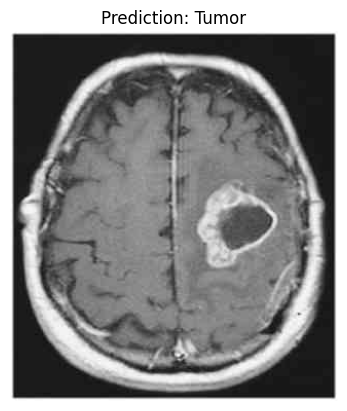

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("brain_tumor_model.keras")  # Make sure you've saved the model with this name

# Change this to the path of your test image
img_path = "brain_tumor_dataset/yes/Y10.jpg"  # or any other image

# Step 1: Load and preprocess the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
img = cv2.resize(img, (150, 150))                 # Resize to match training size
img = img / 255.0                                 # Normalize pixel values
img = img.reshape(1, 150, 150, 1)                 # Reshape for the model

# Step 2: Predict
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# Step 3: Show results
labels = ["No Tumor", "Tumor"]
result = labels[predicted_class]

# Display image with prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
files.download("brain_tumor_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>